In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randn(3, 1000)
y = np.random.randint(2, size=1000)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def forward_prop(X, y, params):
    
    """"
    Propagate forward by computing:
    A = sigmoid(W.X + b)
    
    Arguments:
    X -- input data (num_of_features, training_size)
    y -- input data (1, training_size)
    W -- weights (num_of_features, 1)
    b -- scalar value
    
    Returns:
    A -- the prediction
    cost -- the cost function
    """
    
    m = X.shape[1]
    
    Z = np.dot(params['W'].T, X) + params['b']
    A = sigmoid(Z)
    
    cost = -(1/m)*np.sum((y*np.log(A) + (1-y)*np.log(1-A)))
    
    return A, cost

In [5]:
def back_prop(X, A):
    
    """
    Propagate backwards by computing the gradients:
    dA = -(y/A) + (1-y)/(1-A)
    dZ = A - y
    dW = (1/m)*X.dZ
    db = (1/m)*sum(dZ)
    
    Arguments:
    X -- input data (num_of_features, training_size)
    A -- the prediction
    
    Returns:
    dW, db -- gradients with same shape as W, b respectively
    """
    
    m = X.shape[1]
    
    dZ = A - y
    dW = (1/m)*np.dot(X, dZ.T)
    db = (1/m)*np.sum(dZ)
    
    grads = {'dW': dW, 'db': db}
    
    return grads

In [6]:
def update_parameters(params, grads, learning_rate=0.001):
    
    """
    Update the parameters:
    W = W - lr*dW
    b = b - lr*db
    
    Arguments:
    W -- weights (num_of_features, 1)
    b -- scalar value
    dW, db -- gradients
    learning_rate -- the rate at which the params should update (default = 0.001)
    
    Returns:
    W, b -- updated parameters
    """
    
    params['W'] -= learning_rate*grads['dW']
    params['b'] -= learning_rate*grads['db']
    
    return params

In [7]:
def model(X, y, epochs, learning_rate=0.001, visualize=False):
    
    """
    Logistic Regression model
    
    Arguments:
    X -- input data (num_of_features, training_size)
    y -- input data (1, training_size)
    learning_rate -- the rate at which the params should update (default = 0.001)
    epochs -- number of iterations
    visualize -- represent the loss on a graph (default = False)
    
    Returns:
    W, b -- parameters
    """
    
    # initialise the parameters
    W = np.zeros((X.shape[0], 1))
    b = 0
    
    params = {'W': W, 'b': b}
    
    # initialise the gradients
    dW = np.zeros((X.shape[0], 1))
    db = 0
    
    grads = {'dW': dW, 'db': db}
    
    cost = [0]*epochs
    
    # running the algorithm
    for i in range(epochs):
        
        # forward prop
        A, cost[i] = forward_prop(X, y, params)
        
        # printing the cost
        if i%100 == 0:
            print(f'loss after {i} iterations = {cost[i]}')
        
        # backwards prop
        grads = back_prop(X, A)
        
        # updating the params
        params = update_parameters(params, grads, learning_rate)
        
    if visualize:
        
        plt.style.use('fivethirtyeight')
        
        plt.plot(cost, label = 'cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()
        
    return params

loss after 0 iterations = 0.6931471805599454
loss after 100 iterations = 0.6931367288216279
loss after 200 iterations = 0.6931268046485393
loss after 300 iterations = 0.6931173814054574
loss after 400 iterations = 0.693108433801591
loss after 500 iterations = 0.6930999378228065
loss after 600 iterations = 0.6930918706672619
loss after 700 iterations = 0.6930842106842715
loss after 800 iterations = 0.6930769373162456
loss after 900 iterations = 0.6930700310435489
loss after 1000 iterations = 0.6930634733321319
loss after 1100 iterations = 0.6930572465837995
loss after 1200 iterations = 0.6930513340889823
loss after 1300 iterations = 0.6930457199818855
loss after 1400 iterations = 0.6930403891978986
loss after 1500 iterations = 0.6930353274331497
loss after 1600 iterations = 0.6930305211060995
loss after 1700 iterations = 0.6930259573210705
loss after 1800 iterations = 0.6930216238336159
loss after 1900 iterations = 0.6930175090176339
loss after 2000 iterations = 0.6930136018341427
loss 

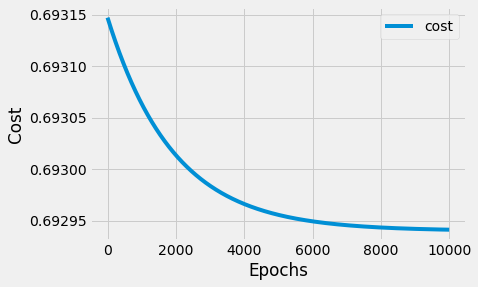

In [8]:
p = model(X, y, 10000, visualize=True)